# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
np.random.seed(42)

# Loading + Splitting The Dataset

In [3]:
digits = load_digits()

print("Dataset Information:")
print(f"Number of samples: {digits.data.shape[0]}")
print(f"Number of features: {digits.data.shape[1]}")
print(f"Number of classes: {len(np.unique(digits.target))}")
print(f"Classes: {np.unique(digits.target)}")

Dataset Information:
Number of samples: 1797
Number of features: 64
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


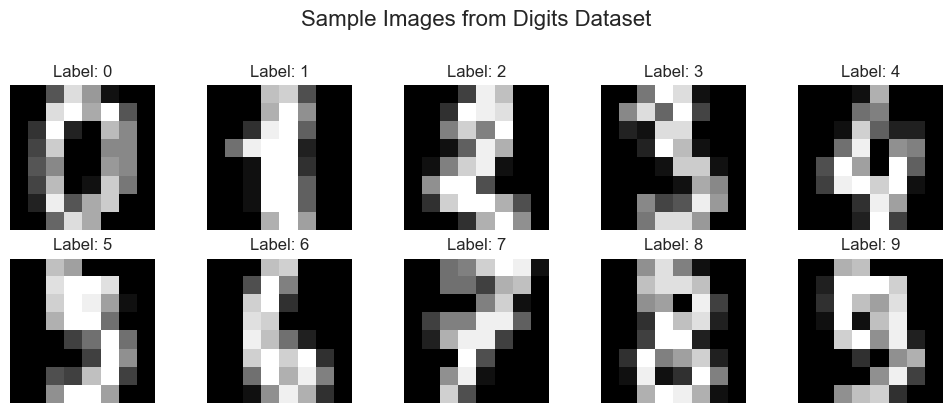

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.suptitle('Sample Images from Digits Dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, 
    test_size=0.2, 
    random_state=42,
    stratify=digits.target 
)

print("Data Split Information:")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(digits.data)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(digits.data)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

Data Split Information:
Training set size: 1437 samples (80.0%)
Testing set size: 360 samples (20.0%)
Number of features: 64


In [6]:
train_class_counts = np.bincount(y_train)
test_class_counts = np.bincount(y_test)

print("Class distribution in training set:")
for i in range(10):
    print(f"  Class {i}: {train_class_counts[i]} samples ({train_class_counts[i]/len(y_train)*100:.1f}%)")

print("\nClass distribution in testing set:")
for i in range(10):
    print(f"  Class {i}: {test_class_counts[i]} samples ({test_class_counts[i]/len(y_test)*100:.1f}%)")

Class distribution in training set:
  Class 0: 142 samples (9.9%)
  Class 1: 146 samples (10.2%)
  Class 2: 142 samples (9.9%)
  Class 3: 146 samples (10.2%)
  Class 4: 145 samples (10.1%)
  Class 5: 145 samples (10.1%)
  Class 6: 145 samples (10.1%)
  Class 7: 143 samples (10.0%)
  Class 8: 139 samples (9.7%)
  Class 9: 144 samples (10.0%)

Class distribution in testing set:
  Class 0: 36 samples (10.0%)
  Class 1: 36 samples (10.0%)
  Class 2: 35 samples (9.7%)
  Class 3: 37 samples (10.3%)
  Class 4: 36 samples (10.0%)
  Class 5: 37 samples (10.3%)
  Class 6: 36 samples (10.0%)
  Class 7: 36 samples (10.0%)
  Class 8: 35 samples (9.7%)
  Class 9: 36 samples (10.0%)


# Implementing CART Model + Evaluation

In [7]:
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)

y_pred_baseline = baseline_dt.predict(X_test)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='weighted')
recall_baseline = recall_score(y_test, y_pred_baseline, average='weighted')
f1_baseline = f1_score(y_test, y_pred_baseline, average='weighted')

print("Baseline Decision Tree Results:")
print(f"  Accuracy:  {accuracy_baseline:.4f}")
print(f"  Precision: {precision_baseline:.4f}")
print(f"  Recall:    {recall_baseline:.4f}")
print(f"  F1-score:  {f1_baseline:.4f}")

Baseline Decision Tree Results:
  Accuracy:  0.8250
  Precision: 0.8241
  Recall:    0.8250
  F1-score:  0.8237


In [8]:
print("Detailed Classification Report for Baseline Model:")
print(classification_report(y_test, y_pred_baseline, target_names=[str(i) for i in range(10)]))

Detailed Classification Report for Baseline Model:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84      0.72      0.78        36
           2       0.78      0.80      0.79        35
           3       0.79      0.81      0.80        37
           4       0.86      0.86      0.86        36
           5       0.88      0.95      0.91        37
           6       0.81      0.83      0.82        36
           7       0.84      0.86      0.85        36
           8       0.71      0.69      0.70        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



# Implementing Decision Tree with Bagging + Evaluation

In [9]:
base_tree = DecisionTreeClassifier(random_state=42)

bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,  
    random_state=42,
    n_jobs=-1  
)

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("Bagging Classifier Results:")
print(f"  Accuracy:  {accuracy_bagging:.4f}")
print(f"  Precision: {precision_bagging:.4f}")
print(f"  Recall:    {recall_bagging:.4f}")
print(f"  F1-score:  {f1_bagging:.4f}")

Bagging Classifier Results:
  Accuracy:  0.9194
  Precision: 0.9195
  Recall:    0.9194
  F1-score:  0.9185


# Implementing AdaBoosting with Low-depth Tree + Evaluation

In [10]:
base_tree_shallow = DecisionTreeClassifier(
    max_depth=3,  
    random_state=42
)

adaboost_model = AdaBoostClassifier(
    estimator=base_tree_shallow,
    n_estimators=50,  
    random_state=42,
    learning_rate=1.0
)

adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

print("AdaBoost Classifier Results:")
print(f"  Accuracy:  {accuracy_adaboost:.4f}")
print(f"  Precision: {precision_adaboost:.4f}")
print(f"  Recall:    {recall_adaboost:.4f}")
print(f"  F1-score:  {f1_adaboost:.4f}")

AdaBoost Classifier Results:
  Accuracy:  0.8639
  Precision: 0.8709
  Recall:    0.8639
  F1-score:  0.8658


# Implementing GBDT Model + Evaluation

In [11]:
gbdt_model = GradientBoostingClassifier(
    n_estimators=100,  
    learning_rate=0.1,
    max_depth=3,  
    random_state=42,
    subsample=0.8 
)

gbdt_model.fit(X_train, y_train)

y_pred_gbdt = gbdt_model.predict(X_test)

accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
precision_gbdt = precision_score(y_test, y_pred_gbdt, average='weighted')
recall_gbdt = recall_score(y_test, y_pred_gbdt, average='weighted')
f1_gbdt = f1_score(y_test, y_pred_gbdt, average='weighted')

print("Gradient Boosting Classifier Results:")
print(f"  Accuracy:  {accuracy_gbdt:.4f}")
print(f"  Precision: {precision_gbdt:.4f}")
print(f"  Recall:    {recall_gbdt:.4f}")
print(f"  F1-score:  {f1_gbdt:.4f}")

Gradient Boosting Classifier Results:
  Accuracy:  0.9611
  Precision: 0.9616
  Recall:    0.9611
  F1-score:  0.9610


# Comprehensive Results Analysis

In [12]:
results = {
    'Model': ['Decision Tree (Baseline)', 'Bagging (Decision Tree)', 'AdaBoost (Shallow Trees)', 'Gradient Boosting (GBDT)'],
    'Accuracy': [accuracy_baseline, accuracy_bagging, accuracy_adaboost, accuracy_gbdt],
    'Precision': [precision_baseline, precision_bagging, precision_adaboost, precision_gbdt],
    'Recall': [recall_baseline, recall_bagging, recall_adaboost, recall_gbdt],
    'F1-Score': [f1_baseline, f1_bagging, f1_adaboost, f1_gbdt]
}

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                   Model  Accuracy  Precision   Recall  F1-Score
Decision Tree (Baseline)  0.825000   0.824086 0.825000  0.823674
 Bagging (Decision Tree)  0.919444   0.919541 0.919444  0.918507
AdaBoost (Shallow Trees)  0.863889   0.870935 0.863889  0.865848
Gradient Boosting (GBDT)  0.961111   0.961595 0.961111  0.961019


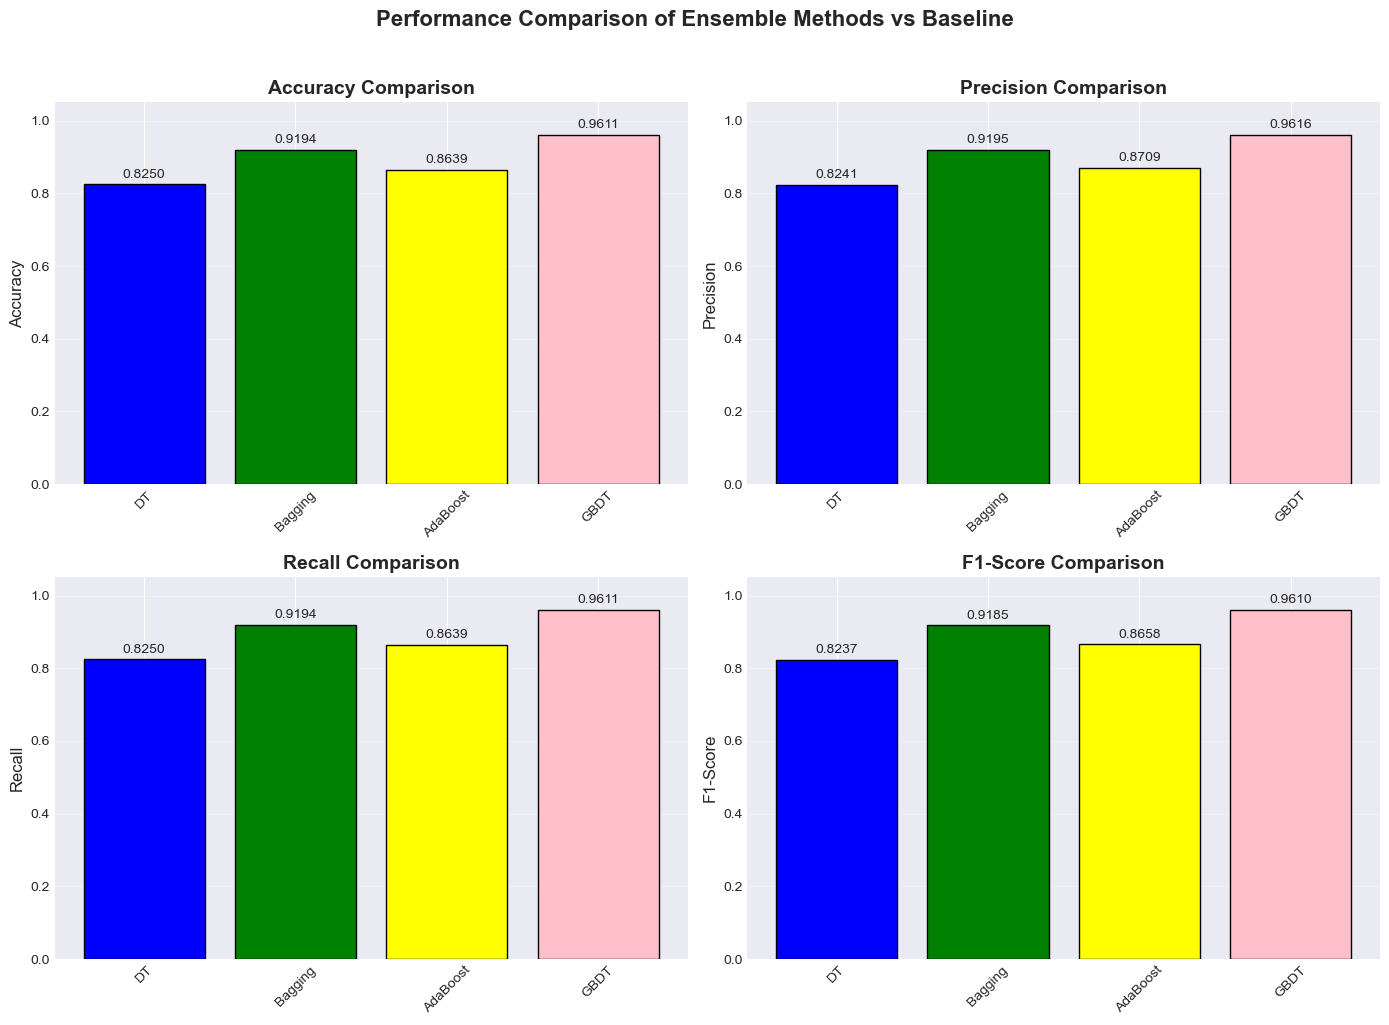

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['blue', 'green', 'yellow', 'pink']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    x_pos = np.arange(len(results_df))
    bars = ax.bar(x_pos, results_df[metric], color=colors, edgecolor='black')
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    ax.set_xticks(x_pos)
    ax.set_xticklabels(['DT', 'Bagging', 'AdaBoost', 'GBDT'], rotation=45)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Performance Comparison of Ensemble Methods vs Baseline', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

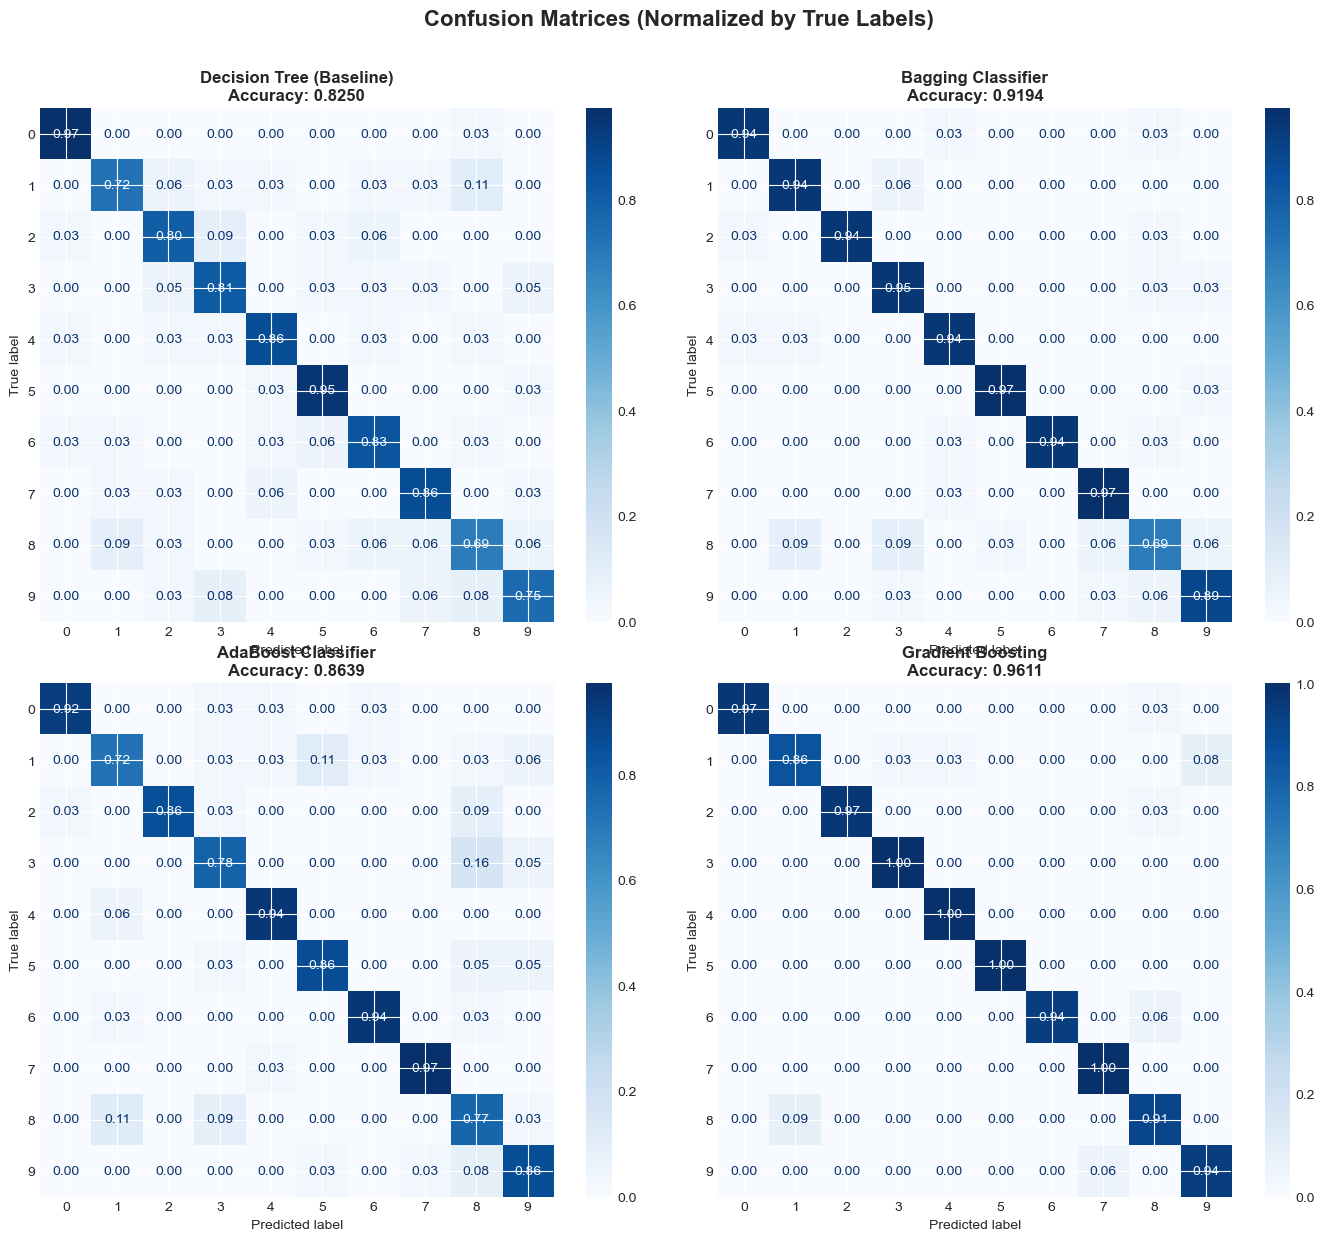

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
models = [
    (baseline_dt, 'Decision Tree (Baseline)', y_pred_baseline),
    (bagging_model, 'Bagging Classifier', y_pred_bagging),
    (adaboost_model, 'AdaBoost Classifier', y_pred_adaboost),
    (gbdt_model, 'Gradient Boosting', y_pred_gbdt)
]

for idx, (model, title, y_pred) in enumerate(models):
    ax = axes[idx // 2, idx % 2]
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(ax=ax, cmap='Blues', values_format='.2f')
    ax.set_title(f'{title}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}', fontsize=12, fontweight='bold')

plt.suptitle('Confusion Matrices (Normalized by True Labels)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Performance Improvement Analysis

In [15]:
baseline_metrics = {
    'Accuracy': accuracy_baseline,
    'Precision': precision_baseline,
    'Recall': recall_baseline,
    'F1-Score': f1_baseline
}

models_metrics = {
    'Bagging': {'Accuracy': accuracy_bagging, 'Precision': precision_bagging, 'Recall': recall_bagging, 'F1-Score': f1_bagging},
    'AdaBoost': {'Accuracy': accuracy_adaboost, 'Precision': precision_adaboost, 'Recall': recall_adaboost, 'F1-Score': f1_adaboost},
    'GBDT': {'Accuracy': accuracy_gbdt, 'Precision': precision_gbdt, 'Recall': recall_gbdt, 'F1-Score': f1_gbdt}
}

improvement_df = pd.DataFrame(index=['Bagging', 'AdaBoost', 'GBDT'], columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

for model_name, metrics in models_metrics.items():
    for metric_name in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
        baseline_val = baseline_metrics[metric_name]
        model_val = metrics[metric_name]
        improvement = ((model_val - baseline_val) / baseline_val) * 100
        improvement_df.loc[model_name, metric_name] = f"{improvement:+.2f}%"

print("\nImprovement compared to Baseline Decision Tree:")
print(improvement_df)


Improvement compared to Baseline Decision Tree:
         Accuracy Precision   Recall F1-Score
Bagging   +11.45%   +11.58%  +11.45%  +11.51%
AdaBoost   +4.71%    +5.68%   +4.71%   +5.12%
GBDT      +16.50%   +16.69%  +16.50%  +16.67%


# Determining Best Model for Each Metric

In [16]:
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    values = {
        'Baseline': baseline_metrics[metric],
        'Bagging': models_metrics['Bagging'][metric],
        'AdaBoost': models_metrics['AdaBoost'][metric],
        'GBDT': models_metrics['GBDT'][metric]
    }
    best_model = max(values, key=values.get)
    best_value = values[best_model]
    print(f"{metric}: {best_model} ({best_value:.4f})")

overall_scores = {}
for model_name in ['Bagging', 'AdaBoost', 'GBDT']:
    avg_score = np.mean([models_metrics[model_name][m] for m in ['Accuracy', 'Precision', 'Recall', 'F1-Score']])
    overall_scores[model_name] = avg_score

best_overall = max(overall_scores, key=overall_scores.get)
print(f"\nOverall Best Model: {best_overall} (Average Score: {overall_scores[best_overall]:.4f})")

Accuracy: GBDT (0.9611)
Precision: GBDT (0.9616)
Recall: GBDT (0.9611)
F1-Score: GBDT (0.9610)

Overall Best Model: GBDT (Average Score: 0.9612)
